In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
def show_results(folder_path):
    rows = folder_path[-3]
    cols = folder_path[-1]

    def show_arriving():
        #Show # arriving cars
        non_mem = np.mean(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)
        non_mem_std = np.std(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)

        mem = np.mean(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)
        mem_std = np.std(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)

        mem_comm = np.mean(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)
        mem_comm_std = np.std(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)

        plt.plot(non_mem, label = 'Non Memory')
        plt.fill_between(x = range(len(non_mem)), y1 = non_mem - non_mem_std, y2 = non_mem + non_mem_std, alpha = 0.2)
        
        plt.plot(mem, label = 'Memory')
        plt.fill_between(x = range(len(mem)), y1 = mem - mem_std, y2 = mem + mem_std, alpha = 0.2)

        plt.plot(mem_comm, label = 'Memory + Comm')
        plt.fill_between(x = range(len(mem_comm)), y1 = mem_comm - mem_comm_std, y2 = mem_comm + mem_comm_std, alpha = 0.2)

        plt.title("Number of Cars Reaching Destination")
        plt.ylabel("Number of Cars")
        plt.xlabel("Timesteps")
        plt.grid(True)
        plt.legend()
        

    def show_clearance():
        #Show Total Clearance
        non_mem = np.mean(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)
        non_mem_std = np.std(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)

        mem = np.mean(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)
        mem_std = np.std(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)

        mem_comm = np.mean(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)
        mem_comm_std = np.std(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)


        plt.figure()
        plt.plot(non_mem, label = 'Non Memory')
        plt.fill_between(x = range(len(non_mem)), y1 = non_mem - non_mem_std, y2 = non_mem + non_mem_std, alpha = 0.2)
        
        plt.plot(mem, label = 'Memory')
        plt.fill_between(x = range(len(mem)), y1 = mem - mem_std, y2 = mem + mem_std, alpha = 0.2)

        plt.plot(mem_comm, label = 'Memory + Comm')
        plt.fill_between(x = range(len(mem_comm)), y1 = mem_comm - mem_comm_std, y2 = mem_comm + mem_comm_std, alpha = 0.2)
        plt.title("Total Clearance of All Intersections")
        plt.ylabel("Number of Cars")
        plt.xlabel("Timesteps")
        plt.grid(True)
        plt.legend()


    def show_clearance_per_node():
        #Show Lane Clearance per Node
        with open(f'{folder_path}/node_clearance_{rows}_{cols}_mem_False_comm_False.pickle', 'rb') as f:
            node_clear_non_mem = pickle.load(f)

        with open(f'{folder_path}/node_clearance_{rows}_{cols}_mem_True_comm_False.pickle', 'rb') as f:
            node_clear_mem = pickle.load(f)

        with open(f'{folder_path}/node_clearance_{rows}_{cols}_mem_True_comm_True.pickle', 'rb') as f:
            node_clear_mem_comm = pickle.load(f)

        node_clear_non_mem = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_non_mem.items()}
        node_clear_mem = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem.items()}
        node_clear_mem_comm = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem_comm.items()}

        for node in node_clear_non_mem.keys():
            plt.figure()

            x = range(len(node_clear_non_mem[node][0]))
            plt.plot(x, node_clear_non_mem[node][0], label = 'Non Memory')
            plt.fill_between(x, node_clear_non_mem[node][0] - node_clear_non_mem[node][1], node_clear_non_mem[node][0] + node_clear_non_mem[node][1], alpha = 0.2)

            plt.plot(x, node_clear_mem[node][0], label = 'Memory')
            plt.fill_between(x, node_clear_mem[node][0] - node_clear_mem[node][1], node_clear_mem[node][0] + node_clear_mem[node][1], alpha = 0.2)

            plt.plot(x, node_clear_mem_comm[node][0], label = 'Memory + Comm')
            plt.fill_between(x, node_clear_mem_comm[node][0] - node_clear_mem_comm[node][1], node_clear_mem_comm[node][0] + node_clear_mem_comm[node][1], alpha = 0.2)

            plt.title(f"Lane Clearance in Intersection {node}")
            plt.ylabel("Number of Cars")
            plt.xlabel("Timesteps")
            plt.grid(True)
            plt.legend()

    def show_total_waiting_time():
        #Show Total Waiting Time
        non_mem_waiting = np.mean(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_False_comm_False.npy'))
        non_mem_waiting_std = np.std(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_False_comm_False.npy'))

        mem_waiting = np.mean(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_False.npy'))
        mem_waiting_std = np.std(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_False.npy'))

        mem_comm_waiting = np.mean(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_True.npy'))
        mem_comm_waiting_std = np.std(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_True.npy'))

        print("Average Total Waiting Time")
        display(pd.DataFrame({"Non Memory": [str(round(non_mem_waiting, 2)) + ' +- ' + str(round(non_mem_waiting_std, 2))],
                    "Memory": [str(round(mem_waiting, 2)) + ' +- ' + str(round(mem_waiting_std, 2))],
                    "Memory + Comm": [str(round(mem_comm_waiting, 2)) + ' +- ' + str(round(mem_comm_waiting_std, 2))]}))

    def show_waiting_time_per_node():
        #Show Waiting Time per Node
        with open(f'{folder_path}/node_waiting_time_{rows}_{cols}_mem_False_comm_False.pickle', 'rb') as f:
            node_wait_non_mem = pickle.load(f)

        with open(f'{folder_path}/node_waiting_time_{rows}_{cols}_mem_True_comm_False.pickle', 'rb') as f:
            node_wait_mem = pickle.load(f)

        with open(f'{folder_path}/node_waiting_time_{rows}_{cols}_mem_True_comm_True.pickle', 'rb') as f:
            node_wait_mem_comm = pickle.load(f)

        node_wait_non_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_non_mem.items()}
        node_wait_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem.items()}
        node_wait_mem_comm = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem_comm.items()}

        print("Average Total Waiting Time per Node")
        display(pd.DataFrame({"Non Memory": node_wait_non_mem,
                    "Memory": node_wait_mem,
                    "Memory + Comm": node_wait_mem_comm}))
            

    show_arriving()
    show_clearance()
    show_clearance_per_node()
    show_total_waiting_time()
    show_waiting_time_per_node()
    
    

In [41]:
def show_results_reward(folder_path, comm = False):
    rows = folder_path[-3]
    cols = folder_path[-1]

    def show_arriving():
        #Show # arriving cars
        mem_default = np.mean(np.load(f'{folder_path}_default/total_arriving_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)
        mem_default_std = np.std(np.load(f'{folder_path}_default/total_arriving_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)

        mem_diff = np.mean(np.load(f'{folder_path}_diff/total_arriving_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)
        mem_diff_std = np.std(np.load(f'{folder_path}_diff/total_arriving_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)

        mem_ent = np.mean(np.load(f'{folder_path}_entropy/total_arriving_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)
        mem_ent_std = np.std(np.load(f'{folder_path}_entropy/total_arriving_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)

        plt.plot(mem_default, label = 'Default')
        plt.fill_between(x = range(len(mem_default)), y1 = mem_default - mem_default_std, y2 = mem_default + mem_default_std, alpha = 0.2)
        
        plt.plot(mem_diff, label = 'Diffusion')
        plt.fill_between(x = range(len(mem_diff)), y1 = mem_diff - mem_diff_std, y2 = mem_diff + mem_diff_std, alpha = 0.2)

        plt.plot(mem_ent, label = 'Entropy')
        plt.fill_between(x = range(len(mem_ent)), y1 = mem_ent - mem_ent_std, y2 = mem_ent + mem_ent_std, alpha = 0.2)

        plt.title("Number of Cars Reaching Destination")
        plt.ylabel("Number of Cars")
        plt.xlabel("Timesteps")
        plt.grid(True)
        plt.legend()
        

    def show_clearance():
        #Show Total Clearance
        mem_default = np.mean(np.load(f'{folder_path}_default/total_clearance_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)
        mem_default_std = np.std(np.load(f'{folder_path}_default/total_clearance_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)

        mem_diff = np.mean(np.load(f'{folder_path}_diff/total_clearance_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)
        mem_diff_std = np.std(np.load(f'{folder_path}_diff/total_clearance_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)

        mem_ent = np.mean(np.load(f'{folder_path}_entropy/total_clearance_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)
        mem_ent_std = np.std(np.load(f'{folder_path}_entropy/total_clearance_{rows}_{cols}_mem_True_comm_{comm}.npy'), axis = 0)

        plt.figure()
        plt.plot(mem_default, label = 'Default')
        plt.fill_between(x = range(len(mem_default)), y1 = mem_default - mem_default_std, y2 = mem_default + mem_default_std, alpha = 0.2)
        
        plt.plot(mem_diff, label = 'Diffusion')
        plt.fill_between(x = range(len(mem_diff)), y1 = mem_diff - mem_diff_std, y2 = mem_diff + mem_diff_std, alpha = 0.2)

        plt.plot(mem_ent, label = 'Entropy')
        plt.fill_between(x = range(len(mem_ent)), y1 = mem_ent - mem_ent_std, y2 = mem_ent + mem_ent_std, alpha = 0.2)
        plt.title("Total Clearance of All Intersections")
        plt.ylabel("Number of Cars")
        plt.xlabel("Timesteps")
        plt.grid(True)
        plt.legend()


    def show_clearance_per_node():
        #Show Lane Clearance per Node
        with open(f'{folder_path}_default/node_clearance_{rows}_{cols}_mem_True_comm_{comm}.pickle', 'rb') as f:
            node_clear_mem_default = pickle.load(f)

        with open(f'{folder_path}_diff/node_clearance_{rows}_{cols}_mem_True_comm_{comm}.pickle', 'rb') as f:
            node_clear_mem_diff = pickle.load(f)

        with open(f'{folder_path}_entropy/node_clearance_{rows}_{cols}_mem_True_comm_{comm}.pickle', 'rb') as f:
            node_clear_mem_ent = pickle.load(f)

        node_clear_mem_default = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem_default.items()}
        node_clear_mem_diff = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem_diff.items()}
        node_clear_mem_ent = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem_ent.items()}

        for node in node_clear_mem_default.keys():
            plt.figure()

            x = range(len(node_clear_mem_default[node][0]))
            plt.plot(x, node_clear_mem_default[node][0], label = 'Default')
            plt.fill_between(x, node_clear_mem_default[node][0] - node_clear_mem_default[node][1], node_clear_mem_default[node][0] + node_clear_mem_default[node][1], alpha = 0.2)

            plt.plot(x, node_clear_mem_diff[node][0], label = 'Diffusion')
            plt.fill_between(x, node_clear_mem_diff[node][0] - node_clear_mem_diff[node][1], node_clear_mem_diff[node][0] + node_clear_mem_diff[node][1], alpha = 0.2)

            plt.plot(x, node_clear_mem_ent[node][0], label = 'Entropy')
            plt.fill_between(x, node_clear_mem_ent[node][0] - node_clear_mem_ent[node][1], node_clear_mem_ent[node][0] + node_clear_mem_ent[node][1], alpha = 0.2)

            plt.title(f"Lane Clearance in Intersection {node}")
            plt.ylabel("Number of Cars")
            plt.xlabel("Timesteps")
            plt.grid(True)
            plt.legend()

    def show_total_waiting_time():
        #Show Total Waiting Time
        mem_waiting_default = np.mean(np.load(f'{folder_path}_default/total_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.npy'))
        mem_waiting_default_std = np.std(np.load(f'{folder_path}_default/total_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.npy'))

        mem_waiting_diff = np.mean(np.load(f'{folder_path}_diff/total_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.npy'))
        mem_waiting_diff_std = np.std(np.load(f'{folder_path}_diff/total_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.npy'))

        mem_comm_waiting_ent = np.mean(np.load(f'{folder_path}_entropy/total_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.npy'))
        mem_comm_waiting_ent_std = np.std(np.load(f'{folder_path}_entropy/total_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.npy'))

        print("Average Total Waiting Time")
        display(pd.DataFrame({"Default": [str(round(mem_waiting_default, 2)) + ' +- ' + str(round(mem_waiting_default_std, 2))],
                    "Diffusion": [str(round(mem_waiting_diff, 2)) + ' +- ' + str(round(mem_waiting_diff_std, 2))],
                    "Entropy": [str(round(mem_comm_waiting_ent, 2)) + ' +- ' + str(round(mem_comm_waiting_ent_std, 2))]}))

    def show_waiting_time_per_node():
        #Show Waiting Time per Node
        with open(f'{folder_path}_default/node_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.pickle', 'rb') as f:
            node_wait_default = pickle.load(f)

        with open(f'{folder_path}_diff/node_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.pickle', 'rb') as f:
            node_wait_diff = pickle.load(f)

        with open(f'{folder_path}_entropy/node_waiting_time_{rows}_{cols}_mem_True_comm_{comm}.pickle', 'rb') as f:
            node_wait_ent = pickle.load(f)

        node_wait_default = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_default.items()}
        node_wait_diff = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_diff.items()}
        node_wait_ent = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_ent.items()}

        print("Average Total Waiting Time per Node")
        display(pd.DataFrame({"Default": node_wait_default,
                    "Diffusion": node_wait_diff,
                    "Entropy": node_wait_ent}))
            

    show_arriving()
    show_clearance()
    show_clearance_per_node()
    show_total_waiting_time()
    show_waiting_time_per_node()
    
    

In [47]:
folder_path = '../metrics/run_5_5'
# show_results_reward(folder_path, comm = True)

In [48]:
# folder_path = '../metrics/run_3_3'
# show_results_reward(folder_path, comm = False)

Average Total Waiting Time


C:\Users\Kevin\AppData\Local\Temp\ipykernel_19816\1330184428.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


,Non Memory,Memory,Memory + Comm
0,10.8 +- 5.1,17.71 +- 1.44,23.2 +- 2.48


Average Total Waiting Time per Node


,Non Memory,Memory,Memory + Comm
0,11.23 +- 5.96,18.73 +- 2.39,26.02 +- 3.93
1,11.1 +- 5.33,18.35 +- 1.99,25.21 +- 3.35
5,15.29 +- 10.57,20.34 +- 3.48,27.49 +- 5.26
2,11.55 +- 5.97,17.86 +- 2.17,24.32 +- 2.83
6,7.85 +- 5.45,17.69 +- 2.91,26.88 +- 6.79
3,10.92 +- 5.39,17.65 +- 2.26,23.9 +- 2.94
7,8.13 +- 6.94,17.21 +- 3.0,24.52 +- 3.82
4,12.83 +- 7.27,17.06 +- 2.52,21.53 +- 2.9
8,7.97 +- 6.34,17.3 +- 2.96,25.43 +- 5.05
9,11.85 +- 7.6,16.36 +- 2.69,20.85 +- 3.76


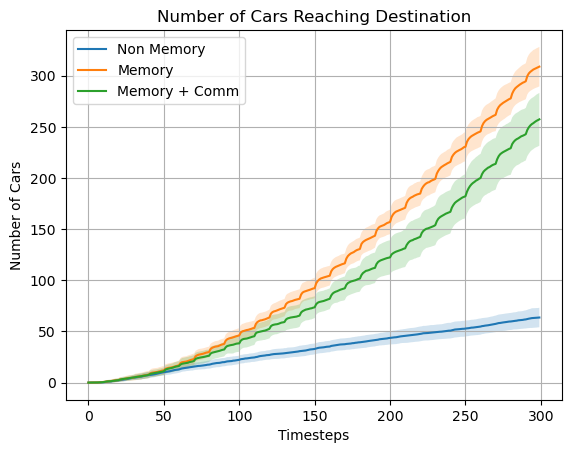

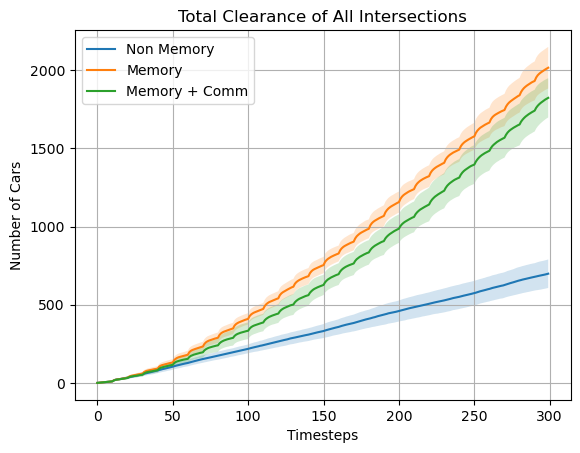

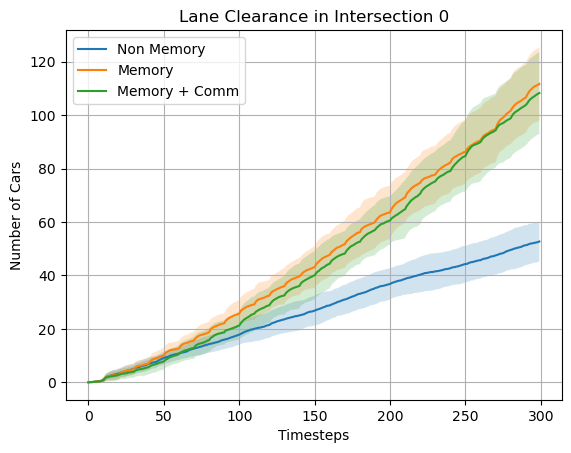

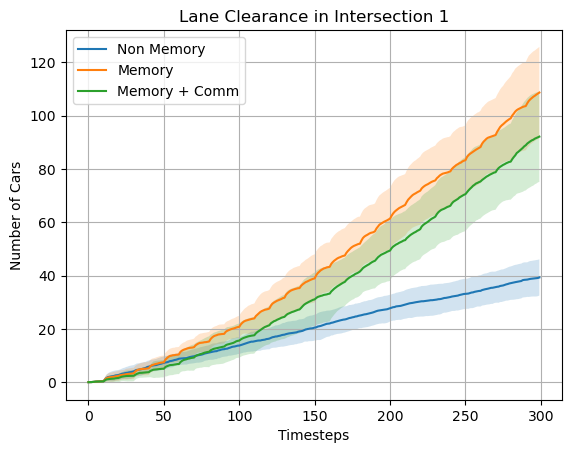

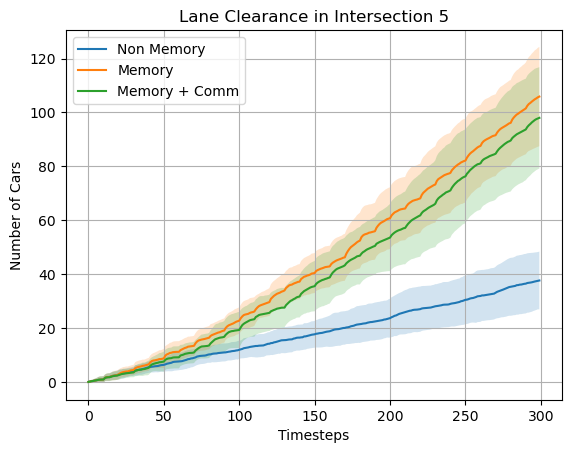

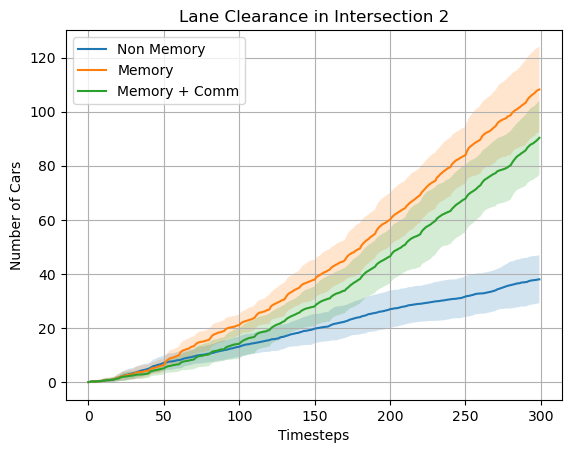

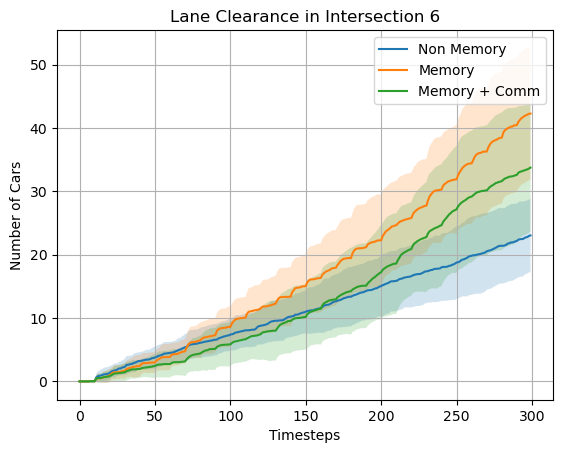

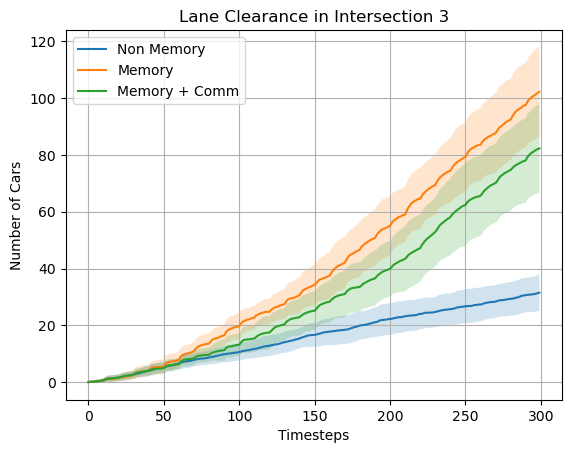

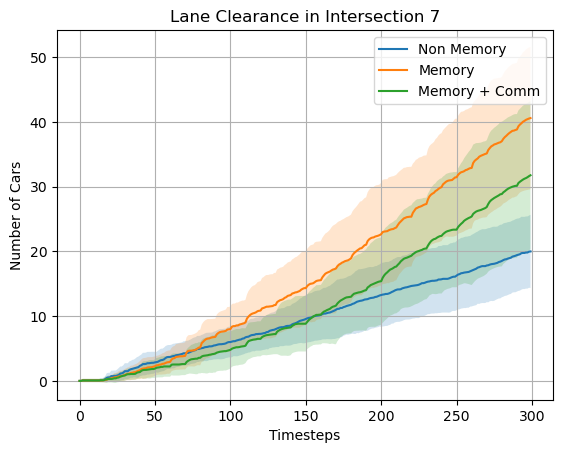

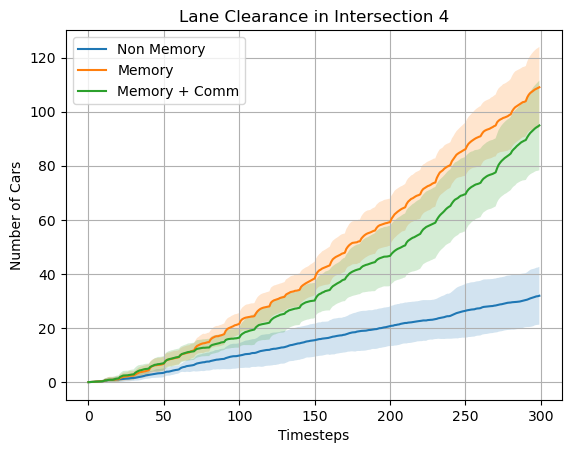

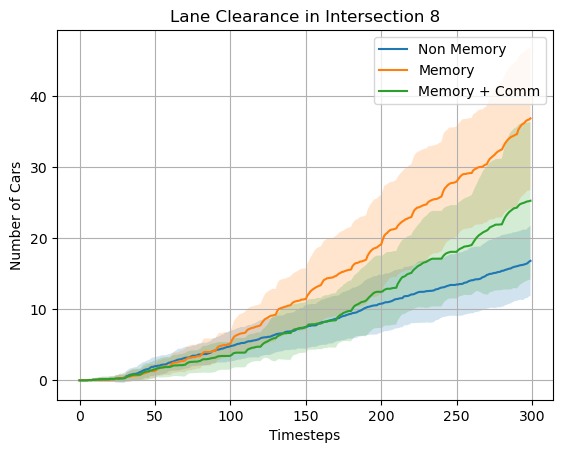

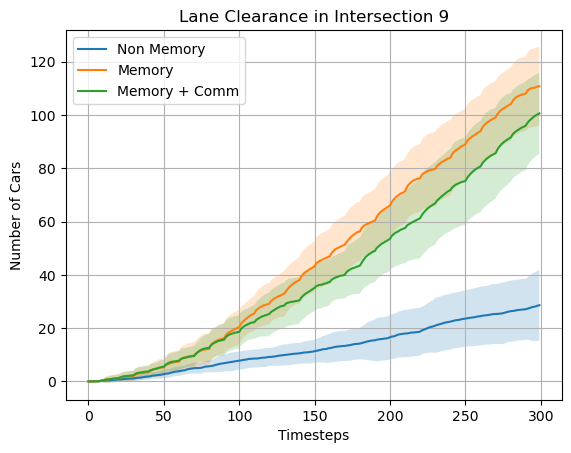

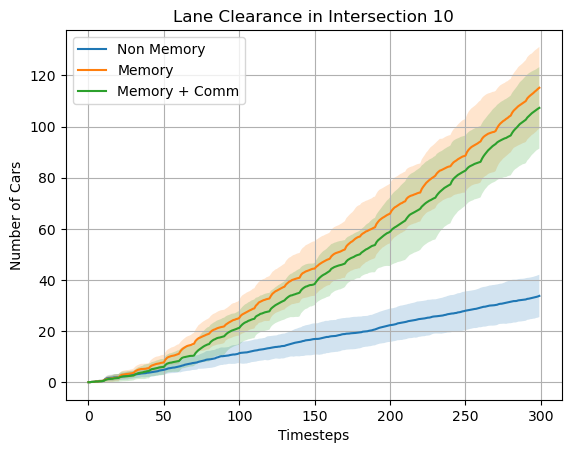

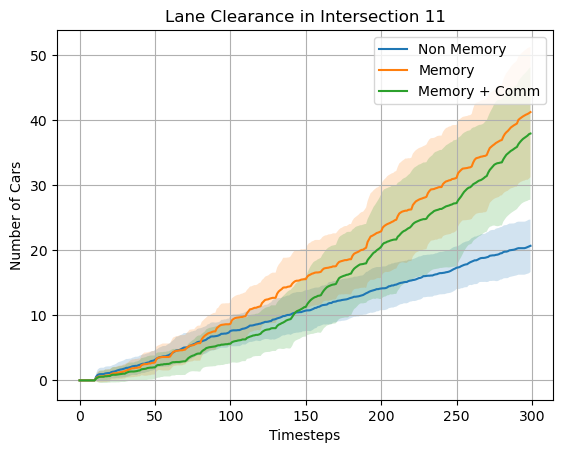

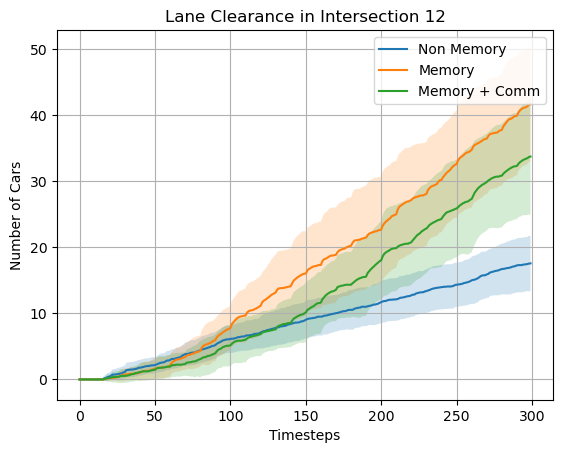

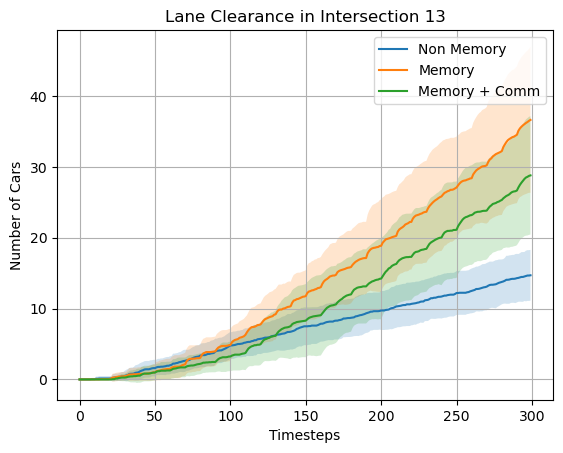

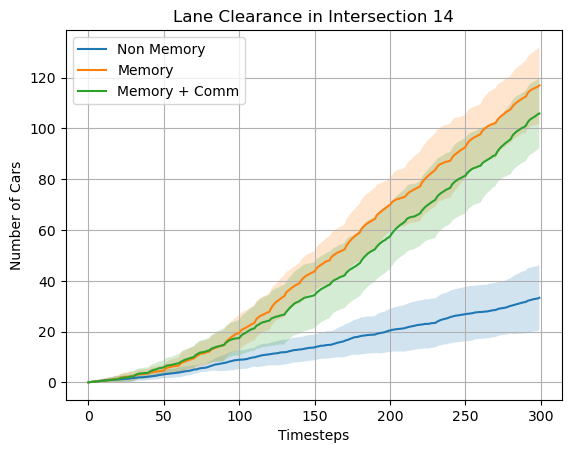

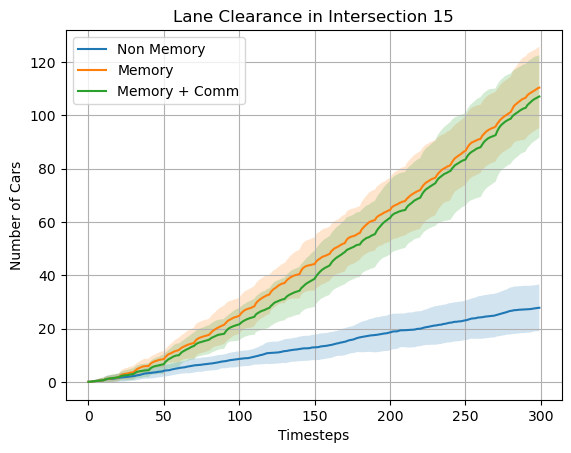

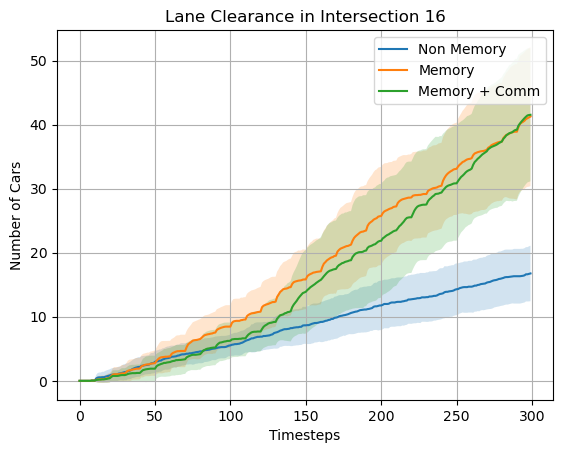

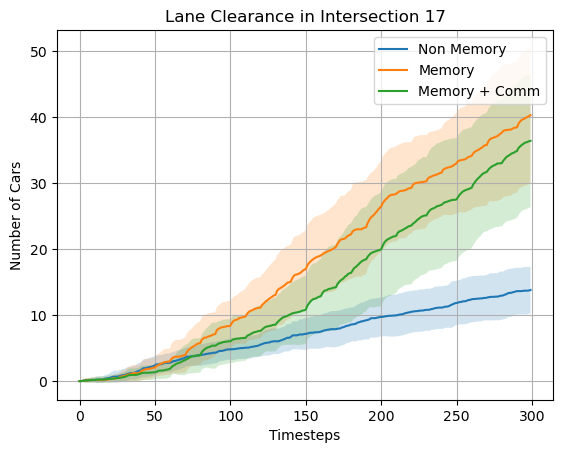

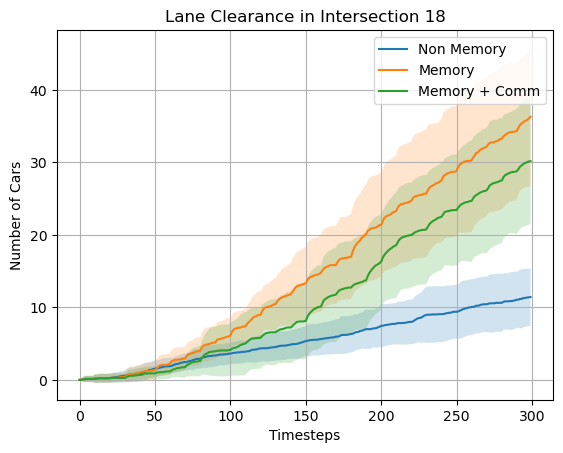

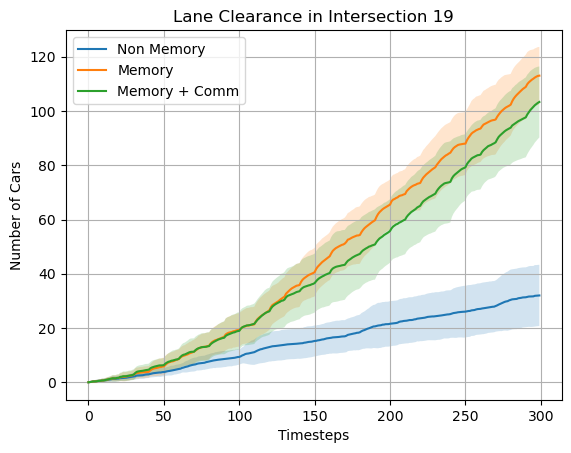

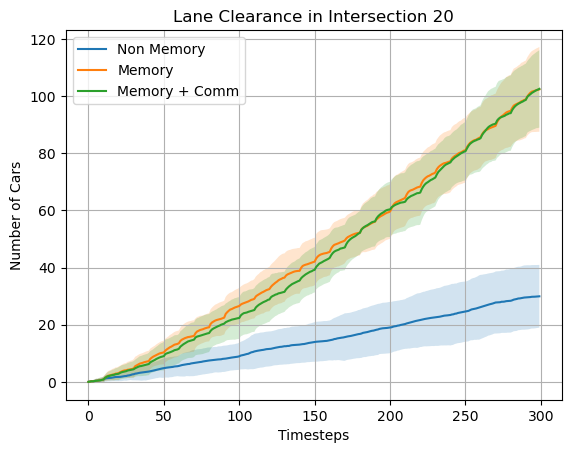

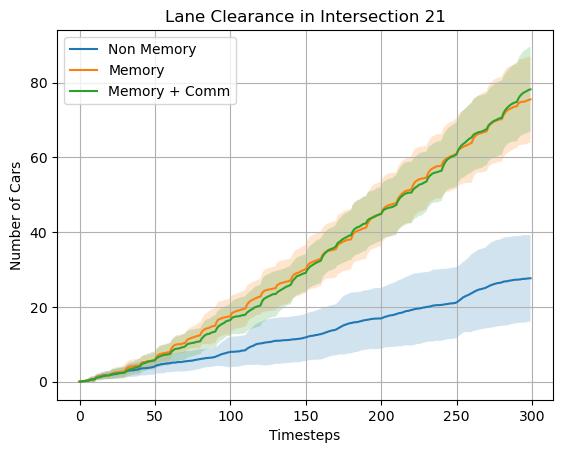

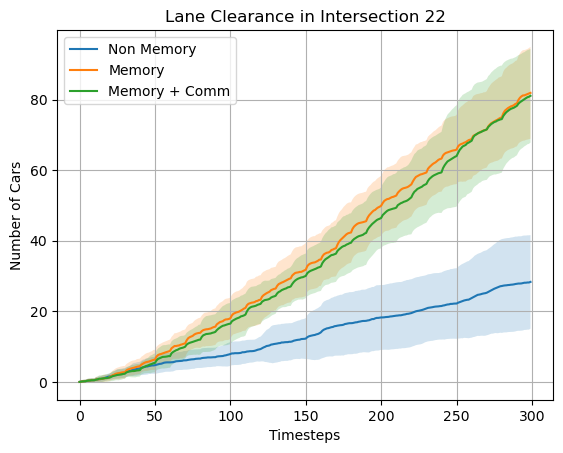

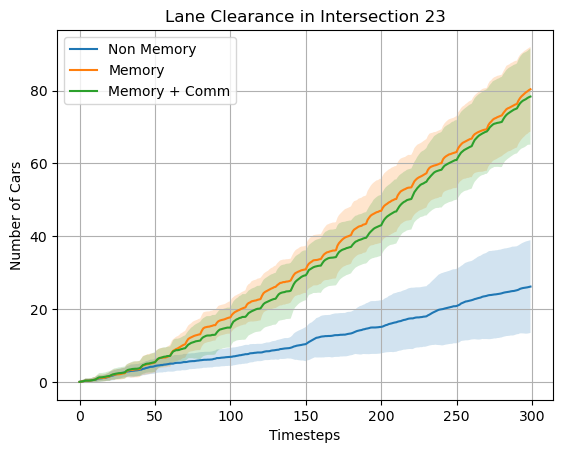

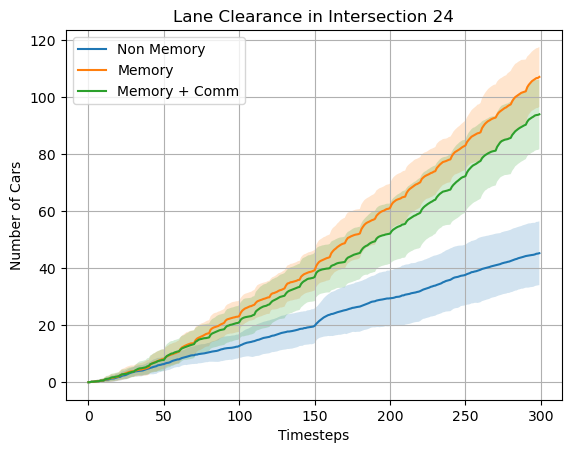

In [49]:

show_results(folder_path)

In [70]:
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_arriving_1_2_mem_False_comm_False.npy'), axis = 0), label = 'Non Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_arriving_1_2_mem_True_comm_False.npy'), axis = 0), label = 'Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_arriving_1_2_mem_True_comm_True.npy'), axis = 0), label = 'Memory + Comm')
# plt.title("Number of Cars Reaching Destination")
# plt.ylabel("Number of Cars")
# plt.xlabel("Timesteps")
# plt.legend()

In [75]:
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_clearance_1_2_mem_False_comm_False.npy'), axis = 0), label = 'Non Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_clearance_1_2_mem_True_comm_False.npy'), axis = 0), label = 'Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_clearance_1_2_mem_True_comm_True.npy'), axis = 0), label = 'Memory + Comm')
# plt.title("Total Clearance of All Intersections")
# plt.ylabel("Number of Cars")
# plt.xlabel("Timesteps")
# plt.legend()

In [83]:
# non_mem_waiting = np.mean(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_False_comm_False.npy'))
# non_mem_waiting_std = np.std(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_False_comm_False.npy'))

# mem_waiting = np.mean(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_False.npy'))
# mem_waiting_std = np.std(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_False.npy'))

# mem_comm_waiting = np.mean(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_True.npy'))
# mem_comm_waiting_std = np.std(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_True.npy'))

# pd.DataFrame({"Non Memory": [str(round(non_mem_waiting, 2)) + ' +- ' + str(round(non_mem_waiting_std, 2))],
#               "Memory": [str(round(mem_waiting, 2)) + ' +- ' + str(round(mem_waiting_std, 2))],
#               "Memory + Comm": [str(round(mem_comm_waiting, 2)) + ' +- ' + str(round(mem_comm_waiting_std, 2))]})

In [78]:
# with open('../metrics/run_1_2/node_clearance_1_2_mem_False_comm_False.pickle', 'rb') as f:
#     node_clear_non_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_clearance_1_2_mem_True_comm_False.pickle', 'rb') as f:
#     node_clear_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_clearance_1_2_mem_True_comm_True.pickle', 'rb') as f:
#     node_clear_mem_comm = pickle.load(f)

# node_clear_non_mem = {key: np.mean(values, axis = 0) for key, values in node_clear_non_mem.items()}
# node_clear_mem = {key: np.mean(values, axis = 0) for key, values in node_clear_mem.items()}
# node_clear_mem_comm = {key: np.mean(values, axis = 0) for key, values in node_clear_mem_comm.items()}

# for node in node_clear_non_mem.keys():
#     plt.figure()
#     plt.plot(range(len(node_clear_non_mem[node])), node_clear_non_mem[node], label = 'Non Memory')
#     plt.plot(range(len(node_clear_mem[node])), node_clear_mem[node], label = 'Memory')
#     plt.plot(range(len(node_clear_mem_comm[node])), node_clear_mem_comm[node], label = 'Memory + Comm')
#     plt.title(f"Lane Clearance in Intersection {node}")
#     plt.ylabel("Number of Cars")
#     plt.xlabel("Timesteps")
#     plt.legend()

In [86]:
# with open('../metrics/run_1_2/node_waiting_time_1_2_mem_False_comm_False.pickle', 'rb') as f:
#     node_wait_non_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_waiting_time_1_2_mem_True_comm_False.pickle', 'rb') as f:
#     node_wait_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_waiting_time_1_2_mem_True_comm_True.pickle', 'rb') as f:
#     node_wait_mem_comm = pickle.load(f)

# node_wait_non_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_non_mem.items()}
# node_wait_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem.items()}
# node_wait_mem_comm = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem_comm.items()}

# pd.DataFrame({"Non Memory": node_wait_non_mem,
#               "Memory": node_wait_mem,
#               "Memory + Comm": node_wait_mem_comm})

In [14]:
folder_path

'../metrics/run_1_1'

In [26]:
mem_def = np.mean(np.load(f'../metrics/run_1_1_default/total_arriving_1_1_mem_True_comm_False.npy'), axis = 0)
mem_def_std = np.std(np.load(f'../metrics/run_1_1_default/total_arriving_1_1_mem_True_comm_False.npy'), axis = 0)

mem_diff = np.mean(np.load(f'../metrics/run_1_1_diff/total_arriving_1_1_mem_True_comm_False.npy'), axis = 0)
mem_diff_std = np.std(np.load(f'../metrics/run_1_1_diff/total_arriving_1_1_mem_True_comm_False.npy'), axis = 0)

mem_ent = np.mean(np.load(f'../metrics/run_1_1_entropy/total_arriving_1_1_mem_True_comm_False.npy'), axis = 0)
mem_ent_std = np.std(np.load(f'../metrics/run_1_1_entropy/total_arriving_1_1_mem_True_comm_False.npy'), axis = 0)

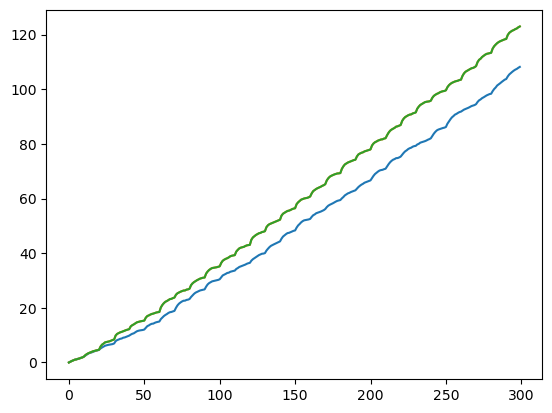

In [27]:
plt.plot(mem_def)
plt.plot(mem_diff)
plt.plot(mem_ent)

In [28]:
mem_ent == mem_diff

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,